In [18]:
import pandas as pd
import httpx
import pyarrow as pa
import matplotlib.pyplot as plt

api_url = "https://api.variantperception.com"
api_key = "YOUR_KEY_HERE"

df = pd.read_csv('data/AAPL.csv')
df


,Dates,High,Low,Close,Volume
0,2024-07-26 13:30:00,219.149902,218.000000,218.020004,1552776
1,2024-07-26 13:32:00,218.740005,217.669998,217.669998,490642
2,2024-07-26 13:34:00,217.919998,217.094803,217.791504,519114
3,2024-07-26 13:36:00,217.869995,216.919998,216.929993,525633
4,2024-07-26 13:38:00,217.669998,216.799194,217.320007,378395
...,...,...,...,...,...
190,2024-07-26 19:50:00,218.250000,217.410004,217.419998,311607
191,2024-07-26 19:52:00,217.809998,217.399994,217.449997,230423
192,2024-07-26 19:54:00,217.488495,217.130005,217.350006,431907
193,2024-07-26 19:56:00,217.779999,217.339996,217.700104,433173


In [7]:

df['dt'] = pd.to_datetime(df.Dates).dt.strftime('%Y-%m-%d %H:%M:%S')

requestsHeaders = {
    "Authorization": f"Bearer {api_key}",
    "Content-Type": "application/json",
}
with httpx.Client(http2=True) as client:
    body = {
        "index": df.dt.to_list(),
        "high": df.High.to_list(),
        "low": df.Low.to_list(),
        "close": df.Close.to_list(),
        "volume": df.Volume.to_list(),
        "lookback": 100,
        #"format": "csv",
    }

    res = client.post(
        api_url + "/api/v1/model/fast_money",
        json=body,
        headers=requestsHeaders,
        timeout=600,
    )
    print(res)
    #print(df_res.text)

    with pa.ipc.open_file(res.content) as reader:
        output = reader.read_pandas()

output

<Response [200 OK]>


,fast_money
2024-07-26 13:30:00,NaN
2024-07-26 13:32:00,NaN
2024-07-26 13:34:00,NaN
2024-07-26 13:36:00,NaN
2024-07-26 13:38:00,NaN
...,...
2024-07-26 19:50:00,-1.586039
2024-07-26 19:52:00,-1.478925
2024-07-26 19:54:00,-1.574897
2024-07-26 19:56:00,-0.780773


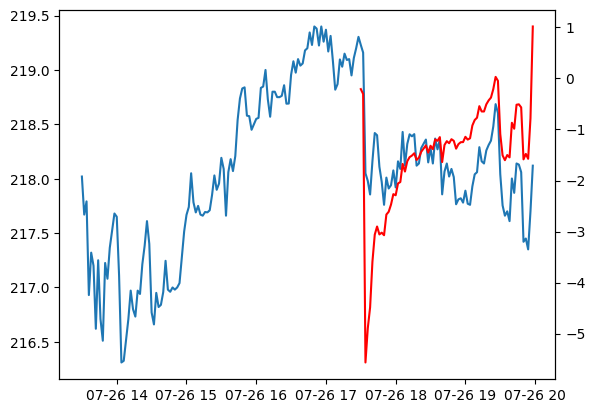

In [17]:

output["close"] = df["Close"].values
plt.plot(output["close"])
plt.twinx().plot(output["fast_money"], color="red")
plt.show()

